# Upper Confidence Bound (UCB)

## Importing the libraries

In [18]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [19]:
dataset = pd.read_csv('Ads_CTR_Optimisation.csv')

## Implementing UCB

In [20]:
import math
N=10000 #total no of users or rounds in the dataset
d=10 # No of ads
ads_selected = []
No_of_Selections = [0]*d #no of ads clicked per round
sum_of_Rewards = [0]*d
total_rewards=0

for n in range(0,N):
    ad = 0
    max_upper_bound = 0
    for i in range(0,d):
        if No_of_Selections[i] > 0:
            average_reward = sum_of_Rewards[i]/No_of_Selections[i]
            delta_i = math.sqrt(3/2*math.log(n+1)/No_of_Selections[i]) #n+1 since index start with 0
            upper_bound = average_reward + delta_i
        else:
            upper_bound = 1e400
        if upper_bound > max_upper_bound:
            max_upper_bound = upper_bound
            ad = i
    ads_selected.append(ad)
    No_of_Selections[ad] = No_of_Selections[ad]+ 1 
    reward = dataset.values[n,ad]
    sum_of_Rewards[ad] = sum_of_Rewards[ad] + reward
    total_rewards = total_rewards + reward


## Visualising the results

Text(0.5, 1.0, 'Histogram of ads selections')

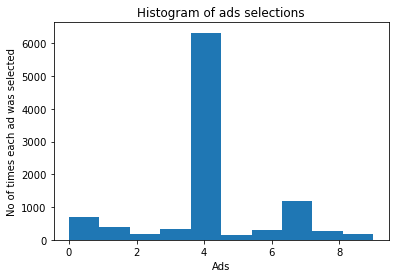

In [21]:
plt.hist(ads_selected)
plt.xlabel('Ads')
plt.ylabel('No of times each ad was selected')
plt.title('Histogram of ads selections')